# Import Psoriasis and Eczema Images to Create Datasets

In [1]:
!pip install selenium

  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)


In [3]:
!pip install bs4

Could not build wheels for bs4, since package 'wheel' is not installed.
    Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'


In [5]:
!pip install requests

Could not build wheels for urllib3, since package 'wheel' is not installed.


In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

import json
import os
import argparse

import requests
import urllib
import urllib3
from urllib3.exceptions import InsecureRequestWarning

import datetime
import time

urllib3.disable_warnings(InsecureRequestWarning)

searchword1 = 'psoriasis'
searchurl = 'https://www.google.com/search?q=' + searchword1 + '&source=lnms&tbm=isch'
dirs = 'pictures\psoriasis' 
maxcount = 1000

chromedriver = r'C:\Drivers\Web_Drivers\chromedriver'

if not os.path.exists(dirs):
    os.mkdir(dirs)

def download_google_staticimages():

    options = webdriver.ChromeOptions()
    options.add_argument('--no-sandbox')
    #options.add_argument('--headless')

    try:
        browser = webdriver.Chrome(chromedriver, options=options)
    except Exception as e:
        print(f'No found chromedriver in this environment.')
        print(f'Install on your machine. exception: {e}')
        sys.exit()

    browser.set_window_size(1280, 1024)
    browser.get(searchurl)
    time.sleep(1)

    print(f'Getting you a lot of images. This may take a few moments...')

    element = browser.find_element_by_tag_name('body')

    # Scroll down
    #for i in range(30):
    for i in range(50):
        element.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.3)

    try:
        browser.find_element_by_id('smb').click()
        for i in range(50):
            element.send_keys(Keys.PAGE_DOWN)
            time.sleep(0.3)
    except:
        for i in range(10):
            element.send_keys(Keys.PAGE_DOWN)
            time.sleep(0.3)

    print(f'Reached end of page.')
    time.sleep(0.5)
    print(f'Retry')
    time.sleep(0.5)

    # Below is in japanese "show more result" sentences. Change this word to your lanaguage if you require.
    browser.find_element_by_xpath('//input[@value="Show more results"]').click()

    # Scroll down 2
    for i in range(50):
        element.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.3)

    try:
        browser.find_element_by_id('smb').click()
        for i in range(50):
            element.send_keys(Keys.PAGE_DOWN)
            time.sleep(0.3)
    except:
        for i in range(10):
            element.send_keys(Keys.PAGE_DOWN)
            time.sleep(0.3)

    #elements = browser.find_elements_by_xpath('//div[@id="islrg"]')
    #page_source = elements[0].get_attribute('innerHTML')
    page_source = browser.page_source 

    soup = BeautifulSoup(page_source, 'lxml')
    images = soup.find_all('img')

    urls = []
    for image in images:
        try:
            url = image['data-src']
            if not url.find('https://'):
                urls.append(url)
        except:
            try:
                url = image['src']
                if not url.find('https://'):
                    urls.append(image['src'])
            except Exception as e:
                print(f'No found image sources.')
                print(e)

    count = 0
    if urls:
        for url in urls:
            try:
                res = requests.get(url, verify=False, stream=True)
                rawdata = res.raw.read()
                with open(os.path.join(dirs, 'img_' + str(count) + '.jpg'), 'wb') as f:
                    f.write(rawdata)
                    count += 1
            except Exception as e:
                print('Failed to write rawdata.')
                print(e)

    browser.close()
    return count

# Main block
def main():
    t0 = time.time()
    count = download_google_staticimages()
    t1 = time.time()

    total_time = t1 - t0
    print(f'\n')
    print(f'Download completed. [Successful count = {count}].')
    print(f'Total time is {str(total_time)} seconds.')

if __name__ == '__main__':
    main()

Getting you a lot of images. This may take a few moments...
Reached end of page.
Retry


Download completed. [Successful count = 750].
Total time is 199.58894443511963 seconds.


# Rotate and Resize Images

In [6]:
!pip install opencv-contrib-python

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import pandas as pd
from collections import Counter
import os

In [2]:
test_img = cv2.imread(r'C:\Users\t4tri\Final Capstone\pictures\psoriasis\img_0.jpg')

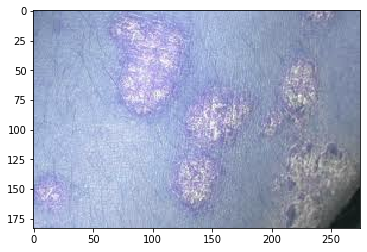

In [4]:
plt.imshow(test_img)

In [16]:
test_img.shape

(183, 275, 3)

In [43]:
#read in image dataset
CATEGORIES = ['eczema', 'psoriasis']
DATADIR = r"C:\Users\t4tri\Final Capstone\pictures"

In [44]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(r"C:\Users\t4tri\Final Capstone\pictures", category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                training_data.append([img_array, class_num])
            except Exception as e:
                pass
            
create_training_data

<function __main__.create_training_data()>

In [46]:
training_data

[]

In [40]:
test2_img = cv2.imread(r'C:\\Users\\t4tri\\Final Capstone\\pictures\\psoriasis\\img_0')

TypeError: Image data of dtype object cannot be converted to float

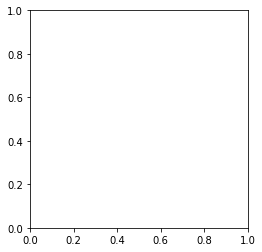

In [41]:
plt.imshow(test2_img)

In [1]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
#for each image
#if img.size[0]>img.size[1]
    #picture.rotate(90).save('imag')

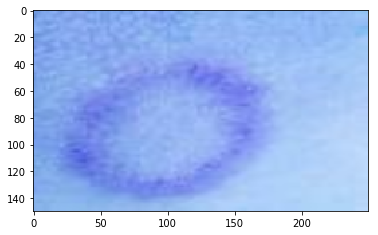

In [34]:
plt.imshow(resized_image)